Graphene unit cell volume: 104.8167866708382 Å³


******** <class 'pyscf.pbc.dft.rks.RKS'> ********
method = RKS
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-07
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /tmp/tmp5kj0pbvp
max_memory 4000 MB (current use 224 MB)
******** PBC SCF flags ********
kpt = [0. 0. 0.]
Exchange divergence treatment (exxdiv) = ewald
Ewald components = 0.017886015064508, -0.208797500090022, 0.795105828268166
    madelung (= occupied orbital energy shift) = -1.2083886864853048
    Total energy shift due to Ewald probe charge = -1/2 * Nelec*madelung = 4.83355474594


/home/xhliu/anaconda3/envs/finalenv/lib/python3.10/site-packages/ase/dft/kpoints.py:405: UserWarning: Please do not use (kpts, x, X) = bandpath(...).  Use path = bandpath(...) and then kpts = path.kpts and (x, X, labels) = path.get_linear_kpoint_axis().
  warnings.warn('Please do not use (kpts, x, X) = bandpath(...).  '


DF object = <pyscf.pbc.df.fft.FFTDF object at 0x7f8658232ec0>
XC functionals = LDA,VWN
small_rho_cutoff = 1e-07
Uniform grid, mesh = [ 45  45 351]
Set gradient conv threshold to 0.000316228
Initial guess from minao.
Big error detected in the electron number of initial guess density matrix (Ne/cell = 10.1065)!
  This can cause huge error in Fock matrix and lead to instability in SCF for low-dimensional systems.
  DM is normalized wrt the number of electrons 8
nelec by numeric integration = 7.99999999874516
    CPU time for vxc     38.83 sec, wall time      2.69 sec
Building PBC AO integrals incore
    CPU time for vj and vk     36.05 sec, wall time      3.34 sec
Ewald components = 4.32069005593024, -7.31468693743995, 50.8561890478015
E1 = -111.03250537303903  Ecoul = 54.17333531251203  Exc = -3.185320721136421
init E= -12.1822986153716
    CPU time for initialize scf    116.96 sec, wall time      9.44 sec
  HOMO = -0.571613056269398  LUMO = -0.113088771624797
  mo_energy =
[-1.10057575 

/home/xhliu/anaconda3/envs/finalenv/lib/python3.10/site-packages/pyscf/pbc/gto/cell.py:127: UserWarning: Function cell.dumps drops attribute a because it is not JSON-serializable
  warnings.warn(msg)


nelec by numeric integration = 7.999999999458948
    CPU time for vxc     26.80 sec, wall time      1.77 sec
    CPU time for vj and vk      0.06 sec, wall time      0.00 sec
E1 = -110.76830932706713  Ecoul = 55.23579397589839  Exc = -3.3663727212015035
cycle= 1 E= -11.0366959060784  delta_E= 1.15  |g|= 3.18e-13  |ddm|= 3.95
    CPU time for cycle= 1     27.59 sec, wall time      1.83 sec
  HOMO = -0.430109077516087  LUMO = 0.0552780114941861
  mo_energy =
[-0.981747   -0.50830057 -0.43010908 -0.43010908  0.05527801  0.05527801
  0.12894293  0.27498668]
nelec by numeric integration = 7.999999999458948
    CPU time for vxc     35.92 sec, wall time      2.37 sec
    CPU time for vj and vk      0.20 sec, wall time      0.01 sec
E1 = -110.76830932706713  Ecoul = 55.2357939758984  Exc = -3.3663727212015044
cycle= 2 E= -11.0366959060784  delta_E= 7.11e-15  |g|= 3.85e-13  |ddm|= 1.43e-12
    CPU time for cycle= 2     37.37 sec, wall time      2.47 sec
  HOMO = -0.430109077516086  LUMO = 0.055

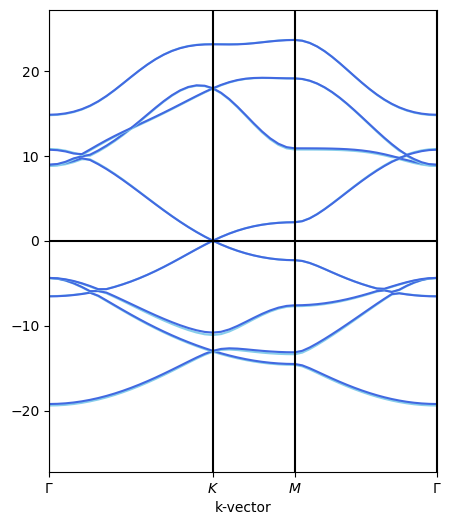

In [9]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import pyscf.pbc.gto as pbcgto
import pyscf.pbc.dft as pbcdft

import pyscf.pbc.tools.pyscf_ase as pyscf_ase

from ase.build import graphene
from ase.dft.kpoints import sc_special_points as special_points, get_bandpath

# Create graphene structure
graphene_structure = graphene(vacuum=10.0)  # Single-layer graphene with vacuum in z-direction
print(f"Graphene unit cell volume: {graphene_structure.get_volume()} Å³")

# Initialize PySCF periodic cell
cell = pbcgto.Cell()
cell.atom = pyscf_ase.ase_atoms_to_pyscf(graphene_structure)
cell.a = graphene_structure.cell  # Lattice vectors

cell.basis = 'gth-szv'
cell.pseudo = 'gth-pade'
cell.verbose = 5
cell.build(None, None)

# Define k-points and band structure path for hexagonal lattice (graphene)
points = special_points['hexagonal']  # Adjusted for hexagonal lattice
G = points['G']
M = points['M']
K = points['K']
band_kpts, kpath, sp_points = get_bandpath([G, K, M, G], graphene_structure.cell, npoints=50)
band_kpts = cell.get_abs_kpts(band_kpts)

# Band structure from Gamma point sampling
mf = pbcdft.RKS(cell)
print(mf.kernel())

e_kn = mf.get_bands(band_kpts)[0]
vbmax = -99
for en in e_kn:
    vb_k = en[cell.nelectron // 2 - 1]
    if vb_k > vbmax:
        vbmax = vb_k
e_kn = [en - vbmax for en in e_kn]

# Band structure from 222 k-point sampling
kmf = pbcdft.KRKS(cell, cell.make_kpts([2, 2, 2]))
print(kmf.kernel())

e_kn_2 = kmf.get_bands(band_kpts)[0]
vbmax = -99
for en in e_kn_2:
    vb_k = en[cell.nelectron // 2 - 1]
    if vb_k > vbmax:
        vbmax = vb_k
e_kn_2 = [en - vbmax for en in e_kn_2]

# Plot band structure
au2ev = 27.21139

emin = -1 * au2ev
emax = 1 * au2ev

plt.figure(figsize=(5, 6))
nbands = cell.nao_nr()
for n in range(nbands):
    plt.plot(kpath, [e[n] * au2ev for e in e_kn], color='#87CEEB')
    plt.plot(kpath, [e[n] * au2ev for e in e_kn_2], color='#4169E1')
for p in sp_points:
    plt.plot([p, p], [emin, emax], 'k-')
plt.plot([0, sp_points[-1]], [0, 0], 'k-')
plt.xticks(sp_points, ['$%s$' % n for n in ['Γ', 'K', 'M', 'Γ']])
plt.axis(xmin=0, xmax=sp_points[-1], ymin=emin, ymax=emax)
plt.xlabel('k-vector')

plt.show()
